In [279]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
# 나무 구조 시각화
import graphviz

from sklearn.preprocessing import StandardScaler
# 데이터 분할
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

# 분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 RandomForest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

import warnings  # 핑크에러 제거
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rc("font", family='NanumBarunGothic')
matplotlib.rc("axes", unicode_minus = False)

### 로지스틱 연습

In [69]:
df_raw = pd.read_csv("/home/piai/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [8]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [9]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=123)

print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [11]:
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ +\
CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.242148
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.2197
Time:                        10:47:47   Log-Likelihood:                -635.15
converged:                       True   LL-Null:                       -814.03
Covariance Type:            nonrobust   LLR p-value:                 2.488e-66
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.6663      0.523     -8.923      0.000      -5.691      -3.641

In [12]:
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)

print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train['BAD'], y_pred_train_class)), "\n")

Train 예측 결과 
 136     0
3676    0
2901    0
3071    0
2101    0
dtype: int64 

Confusion Matrix: 
[[2362   16]
 [ 191   54]] 



In [13]:
y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)

print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test['BAD'], y_pred_test_class)), "\n")

Test 예측 결과 
 3254    0
3479    0
3405    0
1916    1
2237    0
dtype: int64 

Confusion Matrix: 
[[1011   14]
 [  76   24]] 



In [18]:
print('Train 예측/분류 결과')
print('Accuracy: {0:.3f}'.format(accuracy_score(df_train['BAD'], y_pred_train_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_train['BAD'], y_pred_train_class)), "\n")
print(classification_report(df_train['BAD'], y_pred_train_class, digits=3))

print('Test 예측/분류 결과')
print('Accuracy:{0:.3f}\n'.format(accuracy_score(df_test['BAD'], y_pred_test_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['BAD'], y_pred_test_class)), "\n")
print(classification_report(df_test['BAD'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.921
Confusion Matrix:
[[2362   16]
 [ 191   54]] 

              precision    recall  f1-score   support

           0      0.925     0.993     0.958      2378
           1      0.771     0.220     0.343       245

    accuracy                          0.921      2623
   macro avg      0.848     0.607     0.650      2623
weighted avg      0.911     0.921     0.901      2623

Test 예측/분류 결과
Accuracy:0.920

Confusion Matrix:
[[1011   14]
 [  76   24]] 

              precision    recall  f1-score   support

           0      0.930     0.986     0.957      1025
           1      0.632     0.240     0.348       100

    accuracy                          0.920      1125
   macro avg      0.781     0.613     0.653      1125
weighted avg      0.904     0.920     0.903      1125



<Axes: >

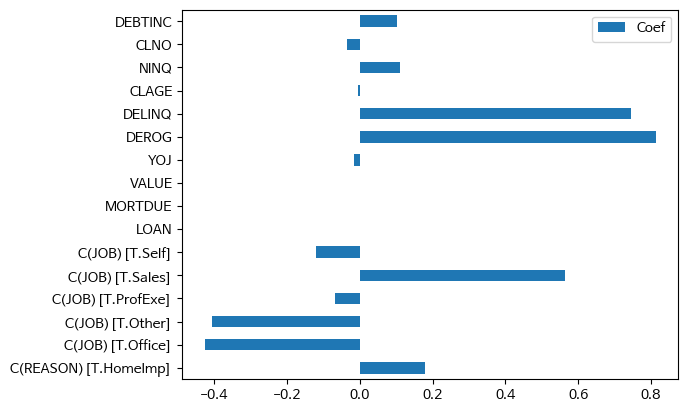

In [19]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef')

In [20]:
df_char = df_raw.select_dtypes(include='object')
df_numeric = df_raw.select_dtypes(exclude='object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [22]:
df_scaled['BAD'] = np.where(df_scaled['BAD']>0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [23]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=123)

In [24]:
scaled_log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ +\
CLAGE + NINQ + CLNO + DEBTINC", df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())


Optimization terminated successfully.
         Current function value: 0.242148
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.2197
Time:                        11:20:57   Log-Likelihood:                -635.15
converged:                       True   LL-Null:                       -814.03
Covariance Type:            nonrobust   LLR p-value:                 2.488e-66
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5983      0.211    -12.285      0.000      -3.013      -2.184

<Axes: >

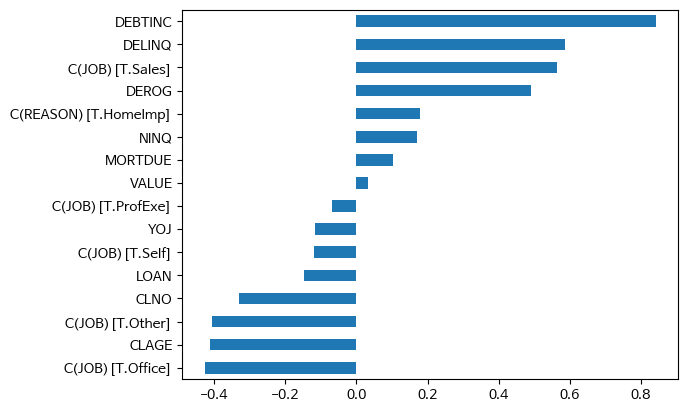

In [25]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]},
                                   index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values(by='Coef').plot.barh(y='Coef', legend=False)

### 로지스틱 실습

In [163]:
df_raw = pd.read_csv("/home/piai/2. Big Data 분석/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [164]:
df_raw.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [165]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               930 non-null    object 
 1   CUSTOMER_ID         930 non-null    object 
 2   GENDER              930 non-null    object 
 3   AGE                 930 non-null    int64  
 4   CHARGE_TYPE         930 non-null    object 
 5   HANDSET             930 non-null    object 
 6   USAGE_BAND          930 non-null    object 
 7   SERVICE_DURATION    930 non-null    float64
 8   DROPPED_CALLS       930 non-null    int64  
 9   PEAK_CALLS_NO       930 non-null    int64  
 10  PEAK_CALLS_TIME     930 non-null    float64
 11  WEEKEND_CALLS_NO    930 non-null    int64  
 12  WEEKEND_CALLS_TIME  930 non-null    float64
 13  TOTAL_CALLS_NO      930 non-null    int64  
 14  TOTAL_CALLS_TIME    930 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 109.1+ K

In [166]:
df_raw['CHURN'] = df_raw['CHURN'].map({'Active':1, 'Churned':0})  # 목표변수를 범주형에서 수치형으로 바꿔줘야함

In [169]:
len(df_raw['CUSTOMER_ID'].unique()), len(df_raw['CUSTOMER_ID'])

(930, 930)

In [149]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=12333)

print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [150]:
df_train['CHURN'] = df_train['CHURN'].astype(int)

In [151]:
df_train

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
638,1,K359140,M,41,CAT 200,S50,Med,18.43,0,278,700.2,40,83.4,378,1010.7
222,1,K187440,F,25,CAT 200,ASAD170,MedHigh,37.73,9,100,1021.8,2,30.0,127,1479.3
873,0,K260440,F,15,Play 100,S80,Med,31.67,0,64,346.2,2,27.6,165,724.2
532,1,K323330,F,46,CAT 200,WC95,Med,17.00,0,59,700.8,15,30.6,197,1110.0
861,0,K251430,M,40,CAT 200,BS110,MedHigh,27.60,0,9,787.8,57,145.2,125,1369.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,K130030,F,43,CAT 200,S50,MedHigh,28.37,10,443,1259.4,5,14.4,793,1843.2
279,1,K246540,F,31,CAT 200,BS110,MedHigh,35.40,0,64,1516.2,3,5.4,118,1856.4
292,1,K248990,F,23,Play 300,BS110,MedHigh,42.80,1,45,350.4,10,32.5,63,1382.8
107,1,K137730,F,46,CAT 200,S50,High,36.27,0,413,1681.8,1,4.8,564,1972.8


In [158]:
log_model = Logit.from_formula("CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + \
C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + \
WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME", df_train)

log_result = log_model.fit( maxiter=100)

print(log_result.summary())

         Current function value: inf
         Iterations: 100


LinAlgError: Singular matrix

### 의사결정나무 - 연습

In [237]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [238]:
# JOB의 결측치에 Other로 채움
df_raw['JOB'].fillna("Other", inplace=True)

# 숫자형 변수의 결측치에 해당 변수의 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [239]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


JOB -> JOB_Mgr,Office,Other

In [240]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

In [241]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.3, random_state = 77)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터:Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18)  Test (1125, 18)


In [242]:
# Over-sampling : SMOTE
from imblearn.over_sampling import SMOTE

# 목표변수 빈도 확인
print(df_raw.value_counts(['BAD']), "\n")
print("BAD=1 비율 ", df_raw.value_counts(df_raw['BAD']==1)/len(df_raw))

BAD
0      3403
1       345
dtype: int64 

BAD=1 비율  BAD
False    0.907951
True     0.092049
dtype: float64


BAD가 1인 자료 적음

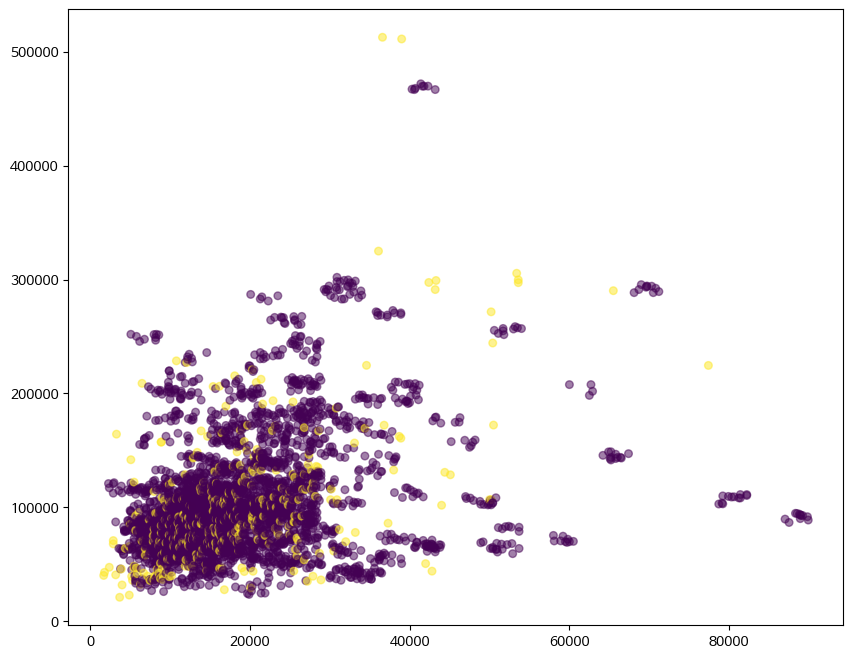

In [243]:
plt.figure(figsize=(10,8))
plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c=df_raw['BAD'], s=30, alpha=0.5)  # s는 점 크기, alpha는 투명도
plt.show()

In [244]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train 데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

# 결과확인
print('Over-Sampling 전:\n', df_train_y.value_counts(), "\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    2377
1     246
Name: BAD, dtype: int64 

Over-Sampling 후 Train X: (4754, 18)
Over-Sampling 후 Train Y: (4754,) 

Over-Sampling 후 '1':2377
Over-Sampling 후 '0':2377


In [245]:
# 데이터 결합
df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())

    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  18400    72718   98065.0   8.0      0     0.0  119.057817   0.0    19   
1  18000    84824  115146.0  21.0      0     0.0  293.980436   0.0    16   
2  28200   100353  131386.0   9.0      0     0.0  146.065483   0.0    28   
3   6400    28041   33438.0   1.0      1     0.0   10.425643  10.0     6   
4   7600    58622   77726.0  15.0      0     0.0  249.633761   2.0    36   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  35.364128               1               0        0           0          1   
1  27.097523               1               0        0           0          1   
2  38.679208               1               0        0           1          0   
3  29.753700               1               0        0           0          1   
4  34.882066               0               1        0           0          1   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0     

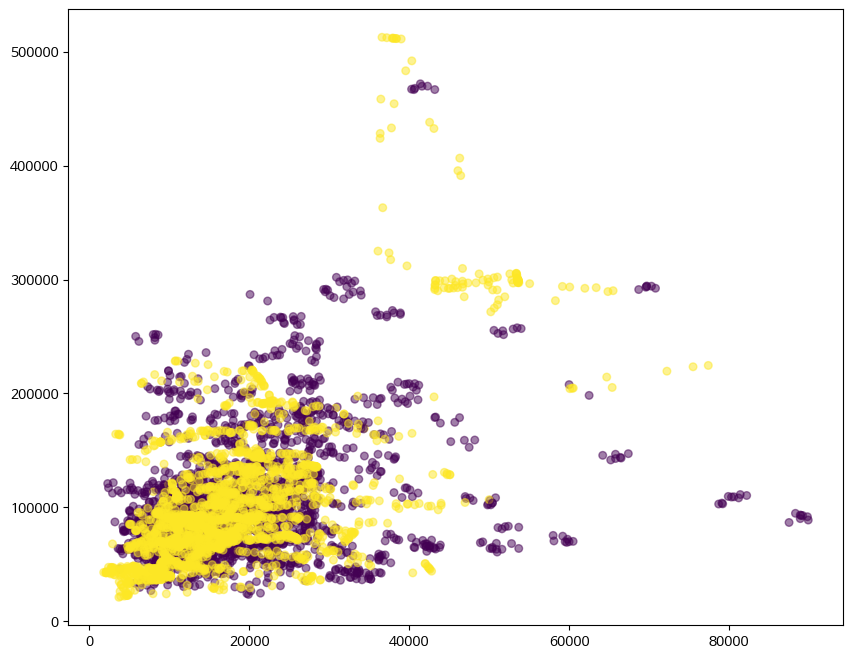

In [327]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['LOAN'], df_resampled['VALUE'], c=df_resampled['BAD'], s=30, alpha=0.5)
plt.show()

In [247]:
# 기본옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=77)
tree_uncustomized.fit(df_train_x, df_train_y)

# train모델 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test모델 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.943


In [248]:
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 77, 'best'])


In [249]:
# max_depth: 최대 깊이 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth : 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=77)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy


In [250]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.925,0.927
1,2,0.926,0.928
2,3,0.932,0.929
3,4,0.938,0.931
4,5,0.939,0.931
5,6,0.947,0.929
6,7,0.953,0.935
7,8,0.958,0.938
8,9,0.963,0.939
9,10,0.970,0.939


depth = 5일때 차이도 적고 정확도도 둘다 높음

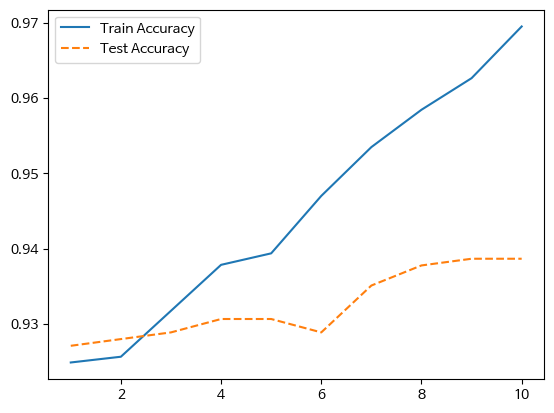

In [251]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.legend()

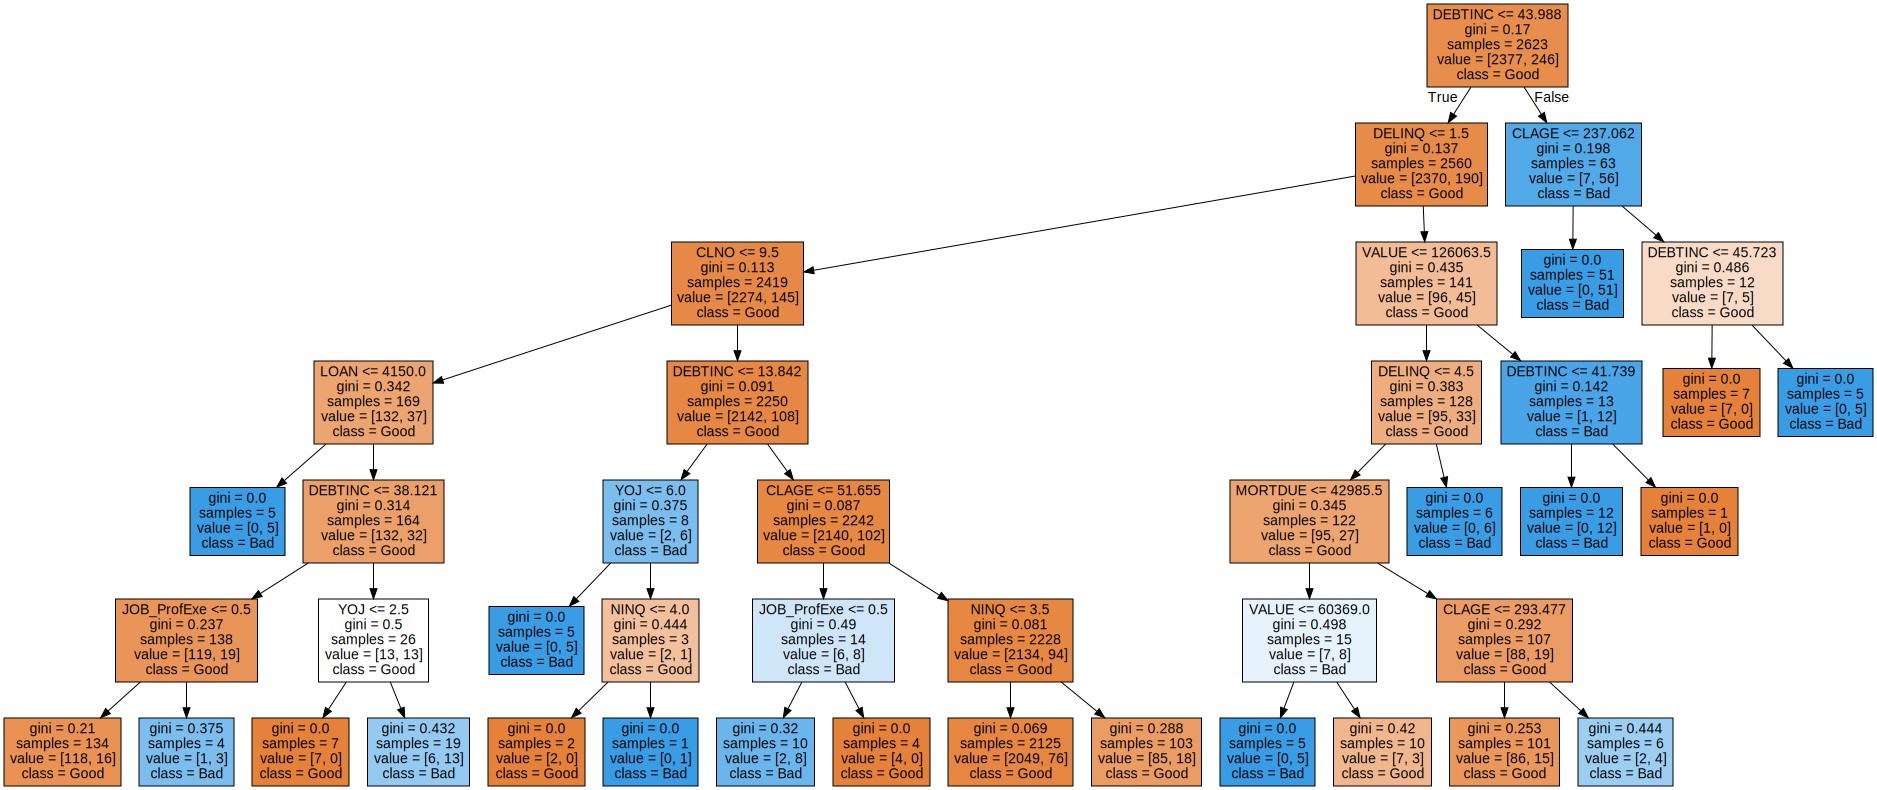

In [252]:
# 나무구조 시각화

v_feature_name = df_train_x.columns  # 열 이름 넣어주기

# depth = 6인 모델
tree_low = DecisionTreeClassifier(max_depth = 6, random_state=77)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수, 0:Good, 1:Bad)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good','Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)

# 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [259]:
# min_samples_split

# train 및 test 정확도 결과 저장용
train_accuracy = [];test_accuracy = []

# min_samples_split: 10~100으로 변경
para_split = [n_split * 10 for n_split in range(1,11)]  # split이 leaf보다 커야하고 2배정도가 돼야하므로 2단위씩 봄


for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(max_depth = 6, random_state=77,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [260]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.946,0.925
1,20,0.941,0.916
2,30,0.938,0.918
3,40,0.938,0.918
4,50,0.938,0.918
5,60,0.938,0.918
6,70,0.937,0.917
7,80,0.937,0.917
8,90,0.937,0.917
9,100,0.937,0.917


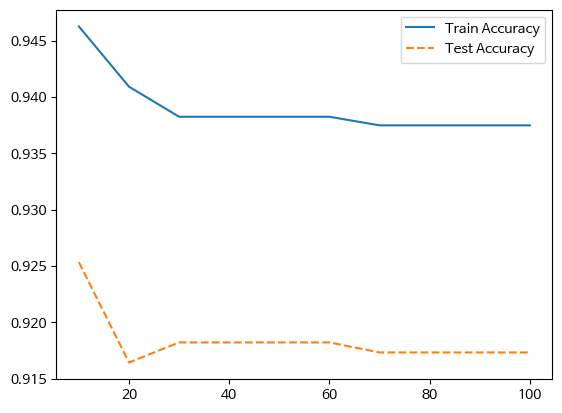

In [261]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.legend()

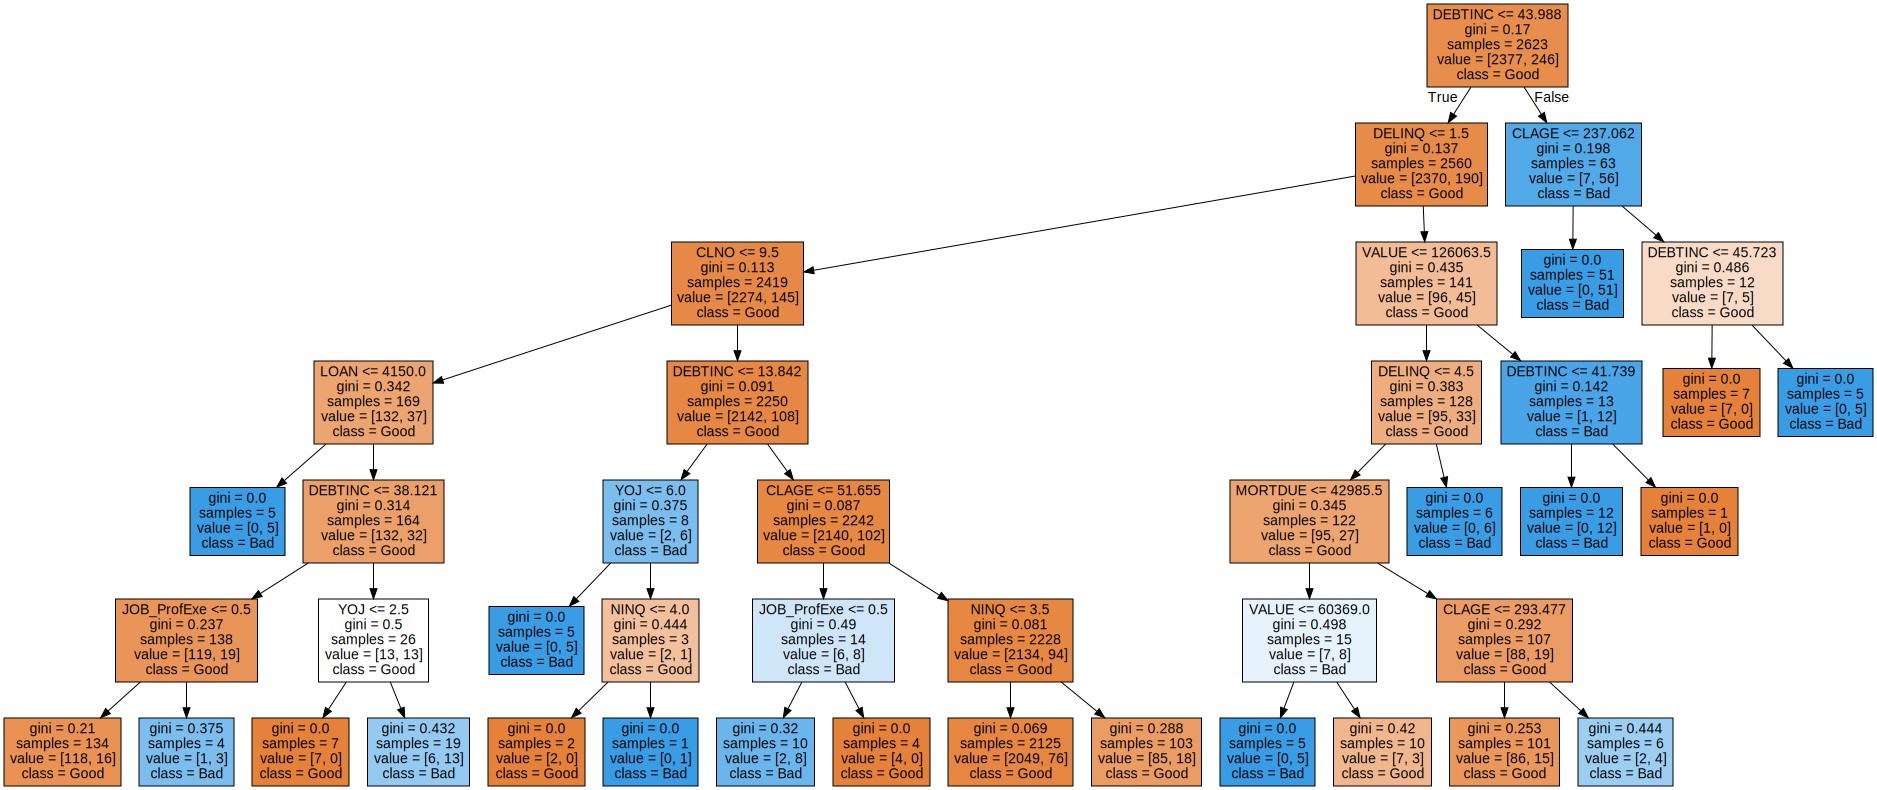

In [262]:
# min_samples_split = 20인 모델
tree_low = DecisionTreeClassifier(max_depth = 6, random_state=77)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수, 0:Good, 1:Bad)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good','Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)

# 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [263]:
# min_samples_leaf

# train 및 test 정확도 결과 저장용
train_accuracy = [];test_accuracy = []

# min_samples_leaf: 10~100으로 변경
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]  


for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth = 6, min_samples_split=20, random_state=77,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [264]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.941,0.916
1,4,0.941,0.916
2,6,0.940,0.916
3,8,0.940,0.909
4,10,0.939,0.907
5,12,0.937,0.916
6,14,0.931,0.910
7,16,0.933,0.909
8,18,0.928,0.915
9,20,0.928,0.915


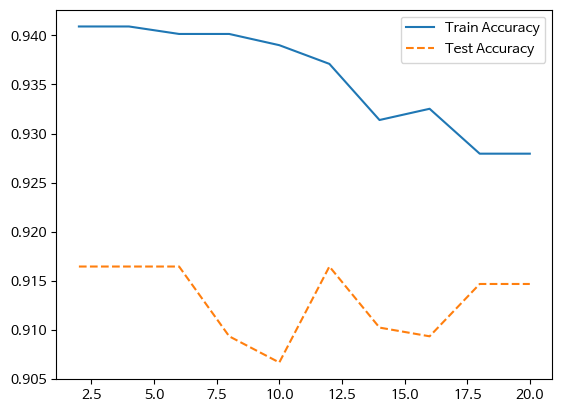

In [265]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.legend()

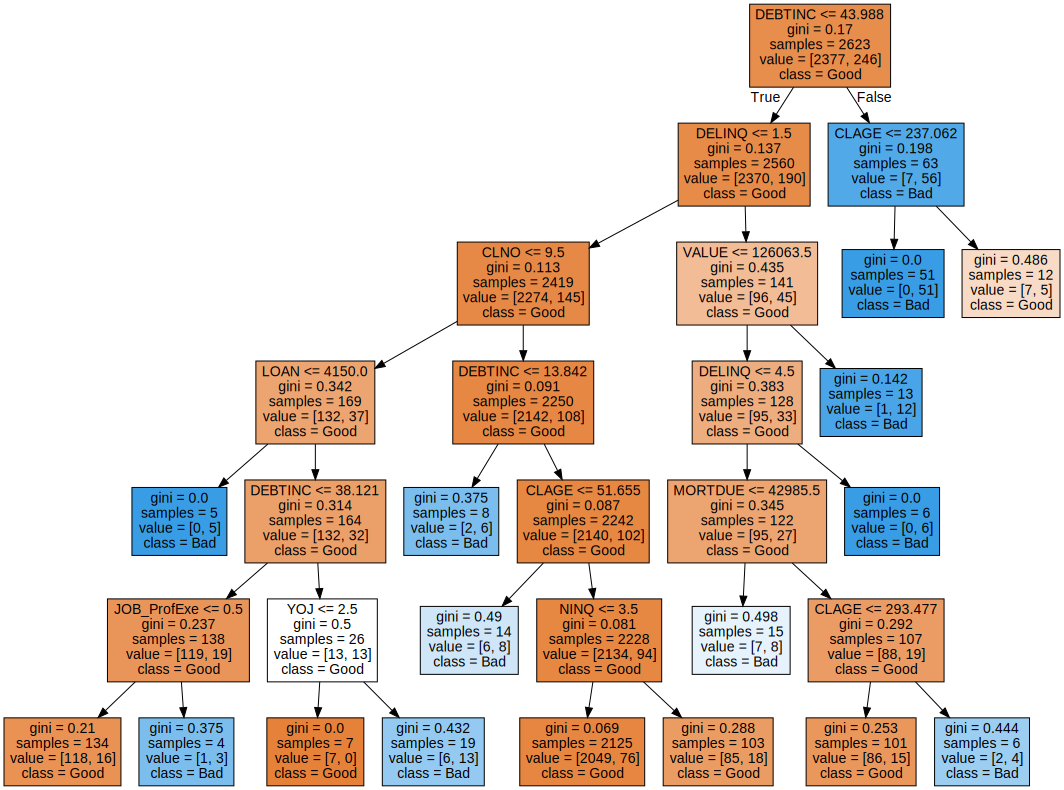

In [266]:
# min_samples_leaf = 10인 모델
tree_low = DecisionTreeClassifier(max_depth = 6, min_samples_split=20, random_state=77)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수, 0:Good, 1:Bad)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good','Bad'],
               feature_names = v_feature_name, impurity = True, filled = True)

# 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [267]:
# 최종 모델 선정
tree_final = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20, max_depth=6, random_state=77)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20,
                       random_state=77)

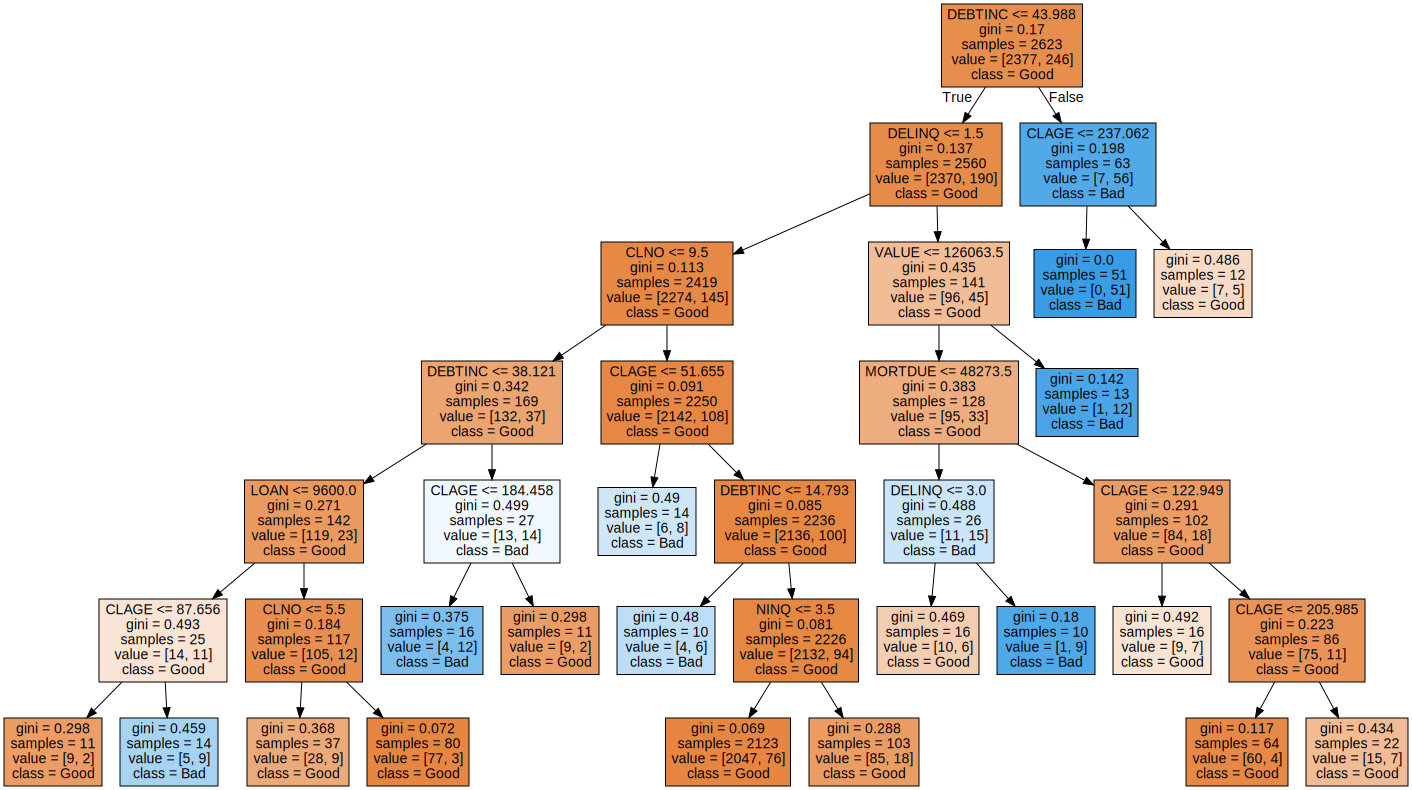

In [270]:
# 최종 모델 시각화
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['Good','Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)
# tree_final.dot 그리기
with open('tree_final.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [272]:
# 최종모델을 이용한 분류 예측 (predict)

y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.907

Confusion matrix:
[[993  33]
 [ 72  27]]
              precision    recall  f1-score   support

           0      0.932     0.968     0.950      1026
           1      0.450     0.273     0.340        99

    accuracy                          0.907      1125
   macro avg      0.691     0.620     0.645      1125
weighted avg      0.890     0.907     0.896      1125



In [273]:
# 결론 도출
df_importance = pd.DataFrame()   # feature_importances_: 설명변수의 중요도
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.527
6,CLAGE,0.146
5,DELINQ,0.120
8,CLNO,0.064
2,VALUE,0.059
1,MORTDUE,0.037
0,LOAN,0.026
7,NINQ,0.021
4,DEROG,0.000
3,YOJ,0.000


Text(0, 0.5, '변수')

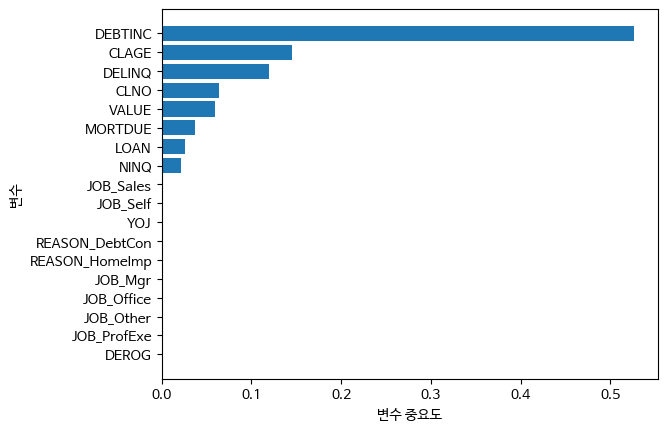

In [274]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [277]:
# GridSearchCV

estimator = DecisionTreeClassifier()

param_grid = {'max_depth':para_depth,'min_samples_split':para_split,
              'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score: 
0.932


## 랜덤포레스트

In [284]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [285]:
# 결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [286]:
# JOB의 결측치에 Other로 채움
df_raw['JOB'].fillna("Other", inplace=True)

# 숫자형 변수의 결측치에 해당 변수의 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [287]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [288]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

In [289]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.3, random_state = 77)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터:Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18)  Test (1125, 18)


In [290]:
# Over-sampling : SMOTE
from imblearn.over_sampling import SMOTE

# 목표변수 빈도 확인
print(df_raw.value_counts(['BAD']), "\n")
print("BAD=1 비율 ", df_raw.value_counts(df_raw['BAD']==1)/len(df_raw))

BAD
0      3403
1       345
dtype: int64 

BAD=1 비율  BAD
False    0.907951
True     0.092049
dtype: float64


In [291]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train 데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

# 결과확인
print('Over-Sampling 전:\n', df_train_y.value_counts(), "\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    2377
1     246
Name: BAD, dtype: int64 

Over-Sampling 후 Train X: (4754, 18)
Over-Sampling 후 Train Y: (4754,) 

Over-Sampling 후 '1':2377
Over-Sampling 후 '0':2377


In [292]:
# 데이터 결합
df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())

    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  18400    72718   98065.0   8.0      0     0.0  119.057817   0.0    19   
1  18000    84824  115146.0  21.0      0     0.0  293.980436   0.0    16   
2  28200   100353  131386.0   9.0      0     0.0  146.065483   0.0    28   
3   6400    28041   33438.0   1.0      1     0.0   10.425643  10.0     6   
4   7600    58622   77726.0  15.0      0     0.0  249.633761   2.0    36   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  35.364128               1               0        0           0          1   
1  27.097523               1               0        0           0          1   
2  38.679208               1               0        0           1          0   
3  29.753700               1               0        0           0          1   
4  34.882066               0               1        0           0          1   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0     

In [293]:
# 기본옵션으로 모델 생성
rf_uncustomized = RandomForestClassifier(random_state=77)
rf_uncustomized.fit(df_train_x, df_train_y)

# train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test모델 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.952


In [294]:
print(rf_uncustomized.get_params().keys())
print(rf_uncustomized.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 77, 0, False])


In [295]:
# n_estimators: 트리 수 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# n_estimators: 트리 수 변경 1~150
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=77)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy


In [296]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.950
1,20,0.998,0.949
2,30,0.999,0.954
3,40,1.000,0.950
4,50,1.000,0.950
5,60,1.000,0.949
6,70,1.000,0.952
7,80,1.000,0.954
8,90,1.000,0.952
9,100,1.000,0.952


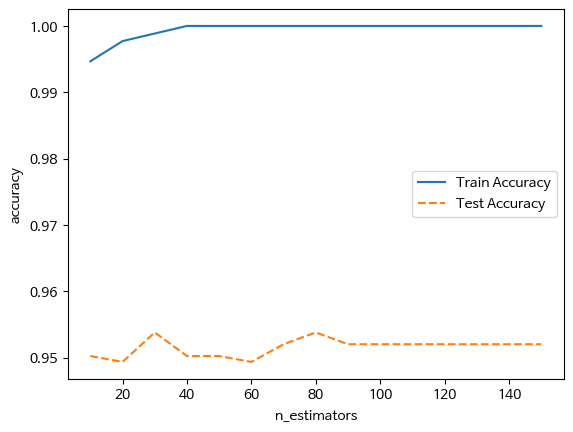

In [297]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.xlabel('n_estimators'); plt.ylabel('accuracy')
plt.legend()

In [301]:
# n_estimators: 트리 수 변경에 따른 모델 oob error 변화

# error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state=77)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)  
# oob(out of bag): 선택 안된 데이터들, oob_score가 올라가면 oob_error는 낮아짐

Text(0.5, 0, 'n_estimators')

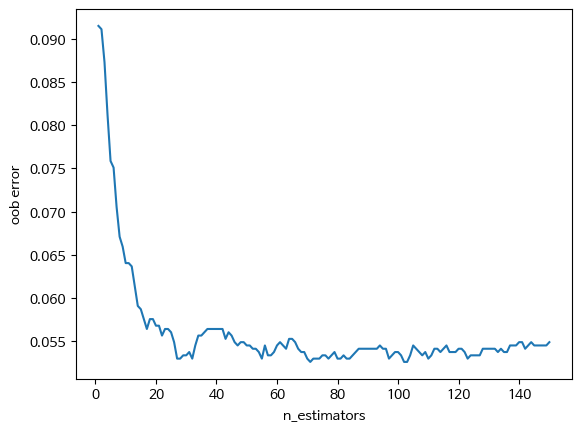

In [302]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [303]:
n_estimators = 100

In [304]:
# max_depth: 최대 깊이 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth : 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth = v_max_depth, random_state=77)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy


In [305]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.906,0.912
1,2,0.911,0.914
2,3,0.926,0.930
3,4,0.927,0.931
4,5,0.932,0.933
5,6,0.936,0.939
6,7,0.941,0.940
7,8,0.945,0.940
8,9,0.952,0.942
9,10,0.958,0.946


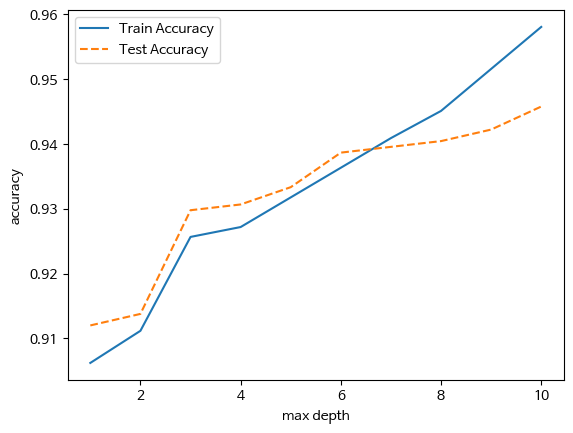

In [308]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

# 최대 깊이 지정
max_depth = 6

In [312]:
# min_samples_split

# train 및 test 정확도 결과 저장용
train_accuracy = [];test_accuracy = []

# min_samples_split: 10~100으로 변경
para_split = [n_split * 10 for n_split in range(1,11)]  


for v_min_samples_split in para_split:
    rf = RandomForestClassifier(max_depth = 6, n_estimators=100, random_state=77,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [313]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.935,0.940
1,20,0.933,0.939
2,30,0.933,0.940
3,40,0.931,0.935
4,50,0.931,0.939
5,60,0.931,0.935
6,70,0.930,0.932
7,80,0.930,0.934
8,90,0.930,0.932
9,100,0.929,0.931


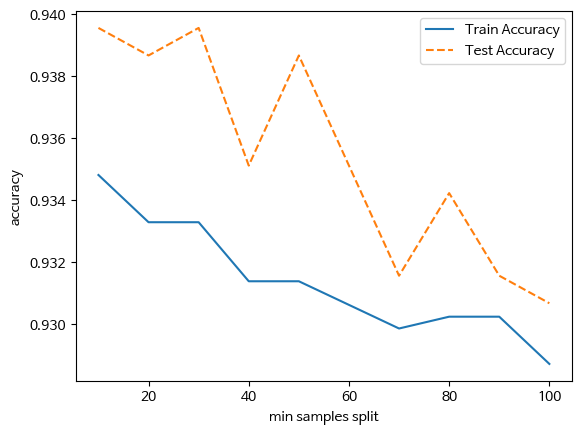

In [314]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()


In [315]:
# min_samples_leaf

# train 및 test 정확도 결과 저장용
train_accuracy = [];test_accuracy = []

# min_samples_leaf: 5~50으로 변경
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]  


for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(max_depth = 6, n_estimators=100, random_state=77,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [316]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.933,0.935
1,10,0.928,0.932
2,15,0.927,0.930
3,20,0.926,0.930
4,25,0.925,0.929
5,30,0.925,0.928
6,35,0.925,0.926
7,40,0.925,0.926
8,45,0.926,0.927
9,50,0.913,0.916


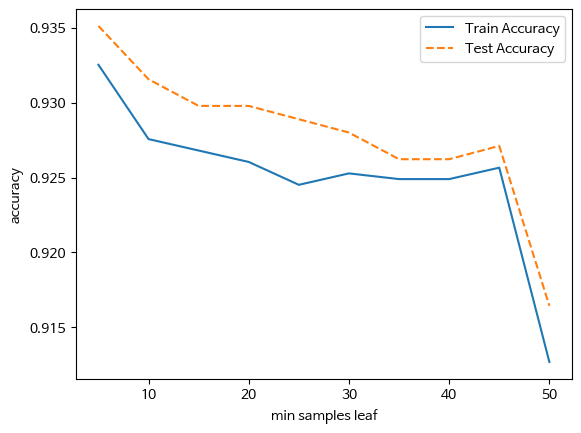

In [318]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle="--", label = 'Test Accuracy')
plt.xlabel('min samples leaf'); plt.ylabel('accuracy')
plt.legend()

# 잎사귀 노드 최소 자료수 지정
min_samples_leaf=20

In [320]:
# 최종 모델 선정
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=6, n_estimators=100, random_state=77)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, random_state=77)

In [321]:
# 최종모델을 이용한 분류 예측 (predict)

y_pred = rf_final.predict(df_test_x)

# train모델 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test모델 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.926
Accuracy on test set: 0.930

Confusion matrix:
[[1025    1]
 [  78   21]]
              precision    recall  f1-score   support

           0      0.929     0.999     0.963      1026
           1      0.955     0.212     0.347        99

    accuracy                          0.930      1125
   macro avg      0.942     0.606     0.655      1125
weighted avg      0.932     0.930     0.909      1125



In [322]:
# 결론 도출

v_feature_name = df_train_x.columns  # 변수명 입력

df_importance = pd.DataFrame()   # feature_importances_: 설명변수의 중요도
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.474
5,DELINQ,0.136
4,DEROG,0.086
6,CLAGE,0.075
8,CLNO,0.048
2,VALUE,0.043
0,LOAN,0.040
7,NINQ,0.036
1,MORTDUE,0.031
3,YOJ,0.015


Text(0, 0.5, '변수')

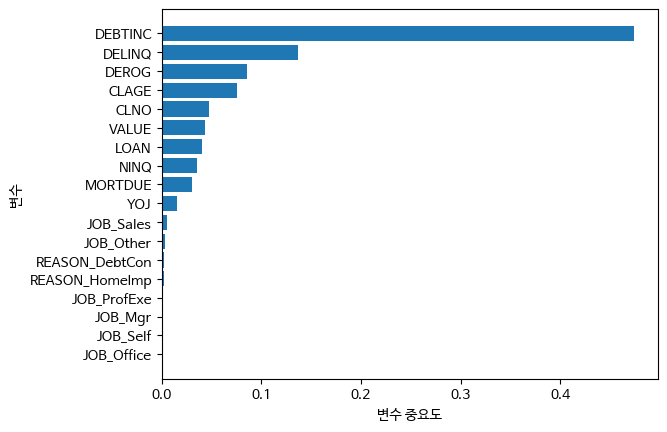

In [323]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [324]:
# GridSearchCV

estimator = RandomForestClassifier(n_estimators=100, random_state=77)

param_grid = {'max_depth':para_depth, 'min_samples_leaf':para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_rf.best_params_))
print('\nbest score: \n{}'.format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=77)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 5}

best score: 
0.931
